In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
import ast

# Loading data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

<Axes: xlabel='job_title_short'>

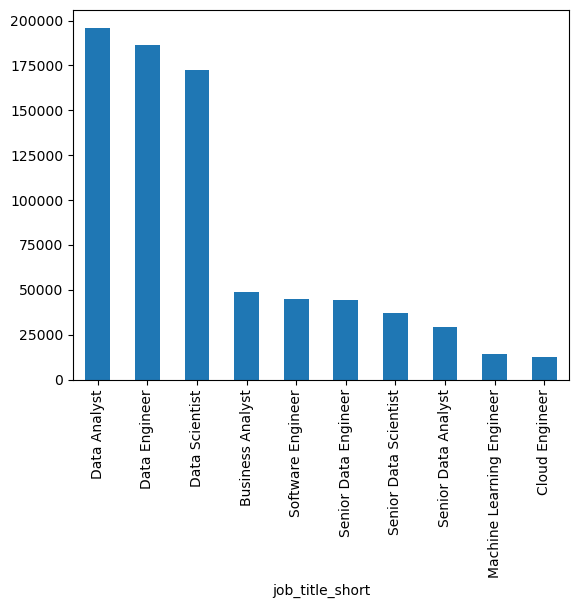

In [4]:
fig, ax = plt.subplots()
df["job_title_short"].value_counts().plot(kind="bar")

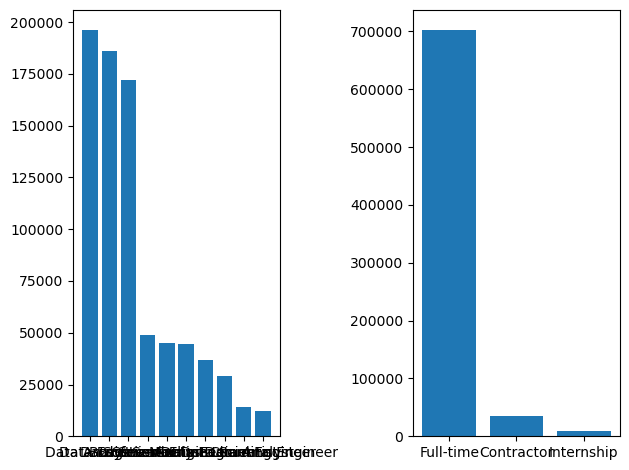

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df["job_title_short"].value_counts().index, df["job_title_short"].value_counts()) #ax.bar(x_values, y_values)
ax[1].bar(df["job_schedule_type"].value_counts().head(3).index, df["job_schedule_type"].value_counts().head(3))

plt.tight_layout()

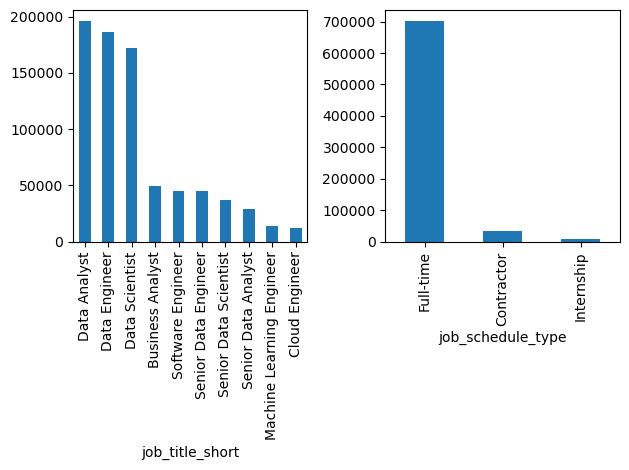

In [7]:
#Using the pandas Method - Same as above
fig, ax = plt.subplots(1,2)

df["job_title_short"].value_counts().plot(kind="bar", ax=ax[0])
df["job_schedule_type"].value_counts().head(3).plot(kind="bar", ax=ax[1])

plt.tight_layout()

In [11]:
df_skills = df.copy()
df_skills = df_skills.explode("job_skills")
skill_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skill_count = skill_count.reset_index(name="skill_count")
df_skill_count.sort_values(by="skill_count", ascending=False, inplace=True)

df_skill_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


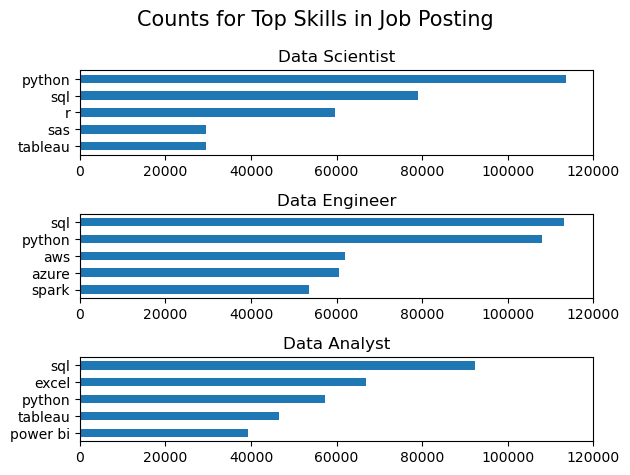

In [34]:
job_titles = ["Data Scientist", "Data Engineer", "Data Analyst" ]

fig, ax = plt.subplots(3, 1)

for i, job_title in enumerate(job_titles):
    df_top_5 = df_skill_count[df_skill_count["job_title_short"] == job_title].head(5)
    df_top_5.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)
    ax[i].set_xlim(0, 120000)

fig.suptitle("Counts for Top Skills in Job Posting", fontsize=15)
fig.tight_layout() 

